# Publications and copies

A notebook that provides an overview of copied poems in the dataset in relation to the publications.

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [1]:
# setup relative path to import local module (needed when used in Conda) https://stackoverflow.com/questions/34478398
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import visualising_poetry.data as vpd

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn
from IPython.display import display

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

## Publications with the first print of poems 

Count the number of times that a publication has the first (identified) publication of a poem. There 
might be yet to be discovered earlier poems.

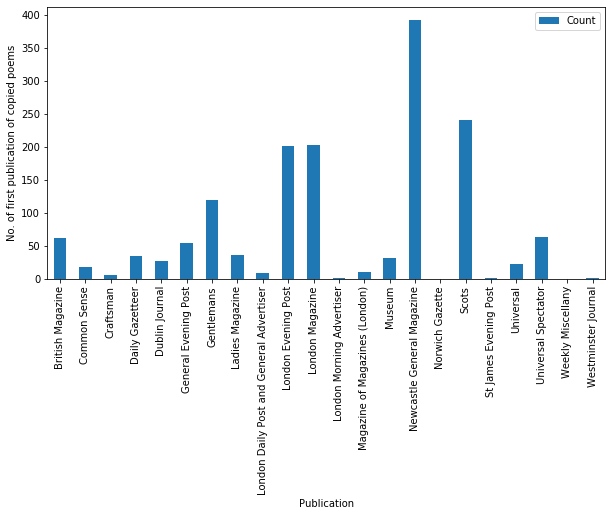

In [2]:
# get the copies as a dataset
copies_df = vpd.copied_poems(df)

# axes
pubs = vpd.publication_list(copies_df)
count = ['Count']

# data frame to track counts
count_df = pd.DataFrame(np.zeros(shape=(pubs.size, 1)), columns=count, index=pubs)

# get the first occurrence of the poem
copies_grouped_first_df = copies_df.sort_values([vpd.REF_NO, vpd.PRINTED_DATE]).groupby(
    vpd.REF_NO)[[vpd.REF_NO, vpd.PUB_TITLE, str(vpd.PRINTED_DATE)[:10]]].nth(0)[vpd.PUB_TITLE]

for title in copies_grouped_first_df:
    count_df.at[title, count[0]] += 1

# display graph
count_df.plot(kind='bar', figsize=(10,5))
plot.xlabel('Publication')
plot.ylabel('No. of first publication of copied poems')
plot.show()

## Table to provide an overview of publishing copies

We create a data frame for copies that records the number of times a publication was printed,
the date of the first print, the date of the last print and the duration between the two (period).

In [3]:
# get the dataset
df = vpd.complete_dataset()

# get the copies
copies_df= vpd.copied_poems(df)

# sort by match id, date
copies_df_sorted = copies_df.sort_values([vpd.REF_NO, vpd.PRINTED_DATE])[[vpd.REF_NO, vpd.PUB_TITLE, vpd.PUB_TYPE, vpd.PRINTED_DATE, vpd.PRINTED_DATE_STR]]

# group by the ref ID
copies_df_sorted_groupby = copies_df_sorted.groupby(vpd.REF_NO)

# we'll have ref numbers as the index and other values as the columns
index = copies_df[vpd.REF_NO].unique()
columns = ["Times Printed", "First Print", "Last Print", "Period"]

# create data frame with nans
copies_overview_df = pd.DataFrame(np.nan, columns=columns, index=index)

# populate the data frame
for name, group in copies_df_sorted_groupby:
    total = len(group.index)
    copies_overview_df.at[name, columns[0]] = total
    start = group[vpd.PRINTED_DATE].iloc[0]
    copies_overview_df.at[name, columns[1]] = start
    end = group[vpd.PRINTED_DATE].iloc[-1]
    copies_overview_df.at[name, columns[2]] = end
    days = (end - start).days
    copies_overview_df.at[name, columns[3]] = days

Display the head of the table:

In [4]:
display(copies_overview_df.head(n=10))

,Times Printed,First Print,Last Print,Period
1000099,5.0,1750-05-01 00:00:00,1754-06-01 00:00:00,1492.0
1001206,2.0,1750-05-01 00:00:00,1750-05-01 00:00:00,0.0
1001154,2.0,1750-06-01 00:00:00,1750-06-01 00:00:00,0.0
1000438,3.0,1750-06-01 00:00:00,1750-07-01 00:00:00,30.0
1001155,2.0,1750-07-01 00:00:00,1750-07-01 00:00:00,0.0
1000906,3.0,1750-07-01 00:00:00,1750-08-01 00:00:00,31.0
1000342,3.0,1750-07-01 00:00:00,1750-07-14 00:00:00,13.0
1001434,2.0,1750-07-01 00:00:00,1750-08-01 00:00:00,31.0
1000141,5.0,1750-07-01 00:00:00,1750-08-11 00:00:00,41.0
1001207,2.0,1750-08-01 00:00:00,1750-08-01 00:00:00,0.0


## How often were copies reprinted?

Show basic information about the number of times copies were printed.

In [5]:
display("Times printed (min): {}".format(copies_overview_df['Times Printed'].min()))
display("Times printed (max): {}".format(copies_overview_df['Times Printed'].max()))
display("Times printed (mean): {}".format(copies_overview_df['Times Printed'].mean()))
display("Times printed (median): {}".format(copies_overview_df['Times Printed'].median()))
display("Times printed (mode): {}".format(copies_overview_df['Times Printed'].mode()[0]))

'Times printed (min): 2.0'

'Times printed (max): 9.0'

'Times printed (mean): 2.3998699609882963'

'Times printed (median): 2.0'

'Times printed (mode): 2.0'

## What was the duration between republication?

Show basic information about the time period between repiblication

'Times period (min): 0.0'

'Times period (max): 6254.0'

'Times period (mean): 243.5370611183355'

'Times period (median): 15.0'

'Times printed (mode): 0.0'

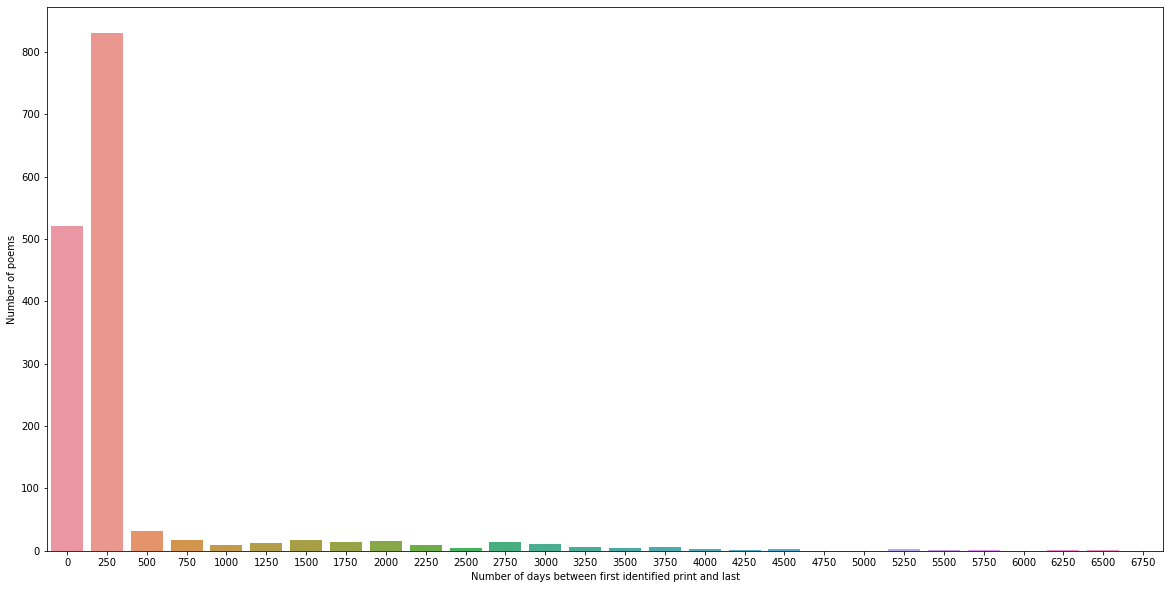

In [6]:
display("Times period (min): {}".format(copies_overview_df['Period'].min()))
display("Times period (max): {}".format(copies_overview_df['Period'].max()))
display("Times period (mean): {}".format(copies_overview_df['Period'].mean()))
display("Times period (median): {}".format(copies_overview_df['Period'].median()))
display("Times printed (mode): {}".format(copies_overview_df['Period'].mode()[0]))

# let's create a plot ...

days_range = np.arange(0, 7000, 250)

results = []
prev = None
for a in days_range:
    if prev is None:
        total = len(copies_overview_df[copies_overview_df['Period'] <= a])
        results.append(total)
    else:
        total = len(copies_overview_df[(copies_overview_df['Period'] > prev) & (copies_overview_df['Period'] <= a)])
        results.append(total)
    prev = a

plot.figure(figsize=(20,10))
plot.xlabel("Number of days between first identified print and last")
plot.ylabel("Number of poems")
sn.barplot(x=days_range, y=results)
plot.show()